In [1]:
import sys
sys.path.append('../..')
from sisyphus2.backend.models.basic import Basic, BasicSigmoid, BasicScan
from sisyphus2.backend.models.lstm import LSTM
from sisyphus2.tasks import rdm as rd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

/Users/jasminestone/anaconda2/envs/py27tensorflow/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
rdm = rd.RDM(N_in = 2, N_out = 2, dt = 10, tau = 100, T = 2000, N_batch = 128)
gen = rdm.batch_generator()

In [3]:
params = rdm.__dict__

In [4]:
params['name'] = 'model'
params['N_rec'] = 50

In [5]:
model = Basic(params)

In [6]:
model.build()

In [7]:
params['name'] = 'model2'
model2 = Basic(params)
model2.build()

In [8]:
tf.get_default_graph().get_name_scope()

''

In [9]:
model.train(gen, {'save_weights_path': '../weights/refactor_weights.npz', 'training_iters': 50000})

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Iter 1280, Minibatch Loss= 0.230967
Iter 2560, Minibatch Loss= 0.145574
Iter 3840, Minibatch Loss= 0.129667
Iter 5120, Minibatch Loss= 0.129220
Iter 6400, Minibatch Loss= 0.120840
Iter 7680, Minibatch Loss= 0.118194
Iter 8960, Minibatch Loss= 0.092964
Iter 10240, Minibatch Loss= 0.104632
Iter 11520, Minibatch Loss= 0.031763
Iter 12800, Minibatch Loss= 0.033324
Iter 14080, Minibatch Loss= 0.022667
Iter 15360, Minibatch Loss= 0.027089
Iter 16640, Minibatch Loss= 0.032616
Iter 17920, Minibatch Loss= 0.018038
Iter 19200, Minibatch Loss= 0.014182
Iter 20480, Minibatch Loss= 0.021675
Iter 21760, Minibatch Loss= 0.018467
Iter 23040, Minibatch Loss= 0.020682
Iter 24320, Minibatch Loss= 0.014948
Iter 25600, Minibatch Loss= 0.010821
Iter 26880, Minibatch Loss= 0.011719
Iter 28160, Minibatch Loss= 0.010269
Iter 29440, Minibatch Loss= 0.009419
Iter 30720, Minibatch Loss= 0.010974
Iter 32000, Minibatch Loss= 0.013641
Iter 3328

([0.23096687,
  0.1455738,
  0.12966736,
  0.12921959,
  0.120840035,
  0.11819374,
  0.09296377,
  0.10463232,
  0.03176292,
  0.033323847,
  0.0226668,
  0.027089184,
  0.032616332,
  0.018037666,
  0.014181969,
  0.021675415,
  0.01846664,
  0.0206819,
  0.014948442,
  0.010821406,
  0.011718733,
  0.010269028,
  0.009418607,
  0.010973836,
  0.013641003,
  0.009984302,
  0.010243608,
  0.009373755,
  0.008952813,
  0.0073142536,
  0.0075508715,
  0.0072504524,
  0.006567701,
  0.0071271677,
  0.0069056246,
  0.0058379746,
  0.0063655735,
  0.010132812,
  0.005976654],
 532.4168260097504,
 31.514954090118408)

In [10]:
model2.train(gen, {'save_weights_path': '../weights/refactor_weights.npz', 'training_iters': 50000})

Iter 1280, Minibatch Loss= 0.204676
Iter 2560, Minibatch Loss= 0.134838
Iter 3840, Minibatch Loss= 0.127288
Iter 5120, Minibatch Loss= 0.133708
Iter 6400, Minibatch Loss= 0.127931
Iter 7680, Minibatch Loss= 0.124113
Iter 8960, Minibatch Loss= 0.125536
Iter 10240, Minibatch Loss= 0.127961
Iter 11520, Minibatch Loss= 0.129949
Iter 12800, Minibatch Loss= 0.127384
Iter 14080, Minibatch Loss= 0.127439
Iter 15360, Minibatch Loss= 0.121383
Iter 16640, Minibatch Loss= 0.119987
Iter 17920, Minibatch Loss= 0.121382
Iter 19200, Minibatch Loss= 0.119262
Iter 20480, Minibatch Loss= 0.125279
Iter 21760, Minibatch Loss= 0.123465
Iter 23040, Minibatch Loss= 0.117167
Iter 24320, Minibatch Loss= 0.107681
Iter 25600, Minibatch Loss= 0.126205
Iter 26880, Minibatch Loss= 0.061000
Iter 28160, Minibatch Loss= 0.083862
Iter 29440, Minibatch Loss= 0.056348
Iter 30720, Minibatch Loss= 0.046004
Iter 32000, Minibatch Loss= 0.054426
Iter 33280, Minibatch Loss= 0.038128
Iter 34560, Minibatch Loss= 0.033196
Iter 358

([0.2046764,
  0.13483804,
  0.12728772,
  0.13370843,
  0.12793112,
  0.12411278,
  0.1255363,
  0.12796102,
  0.12994948,
  0.12738405,
  0.1274389,
  0.12138317,
  0.11998741,
  0.12138221,
  0.11926239,
  0.1252786,
  0.123464815,
  0.11716723,
  0.10768066,
  0.12620455,
  0.06099992,
  0.08386179,
  0.056347705,
  0.046003517,
  0.054425582,
  0.038128186,
  0.033195987,
  0.025744777,
  0.029508062,
  0.025684875,
  0.02161304,
  0.025561566,
  0.017832294,
  0.01391542,
  0.016481215,
  0.011750908,
  0.020057773,
  0.019391917,
  0.012050424],
 288.4041450023651,
 58.66215109825134)

In [11]:
x,y,m = gen.next()

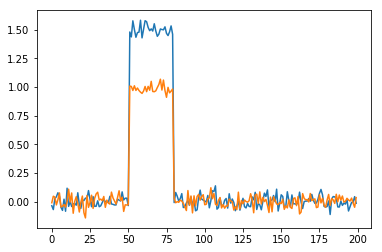

In [12]:
plt.plot(x[0,:,:])

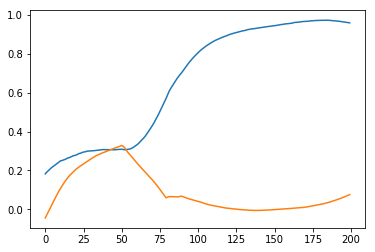

In [13]:
plt.plot(model2.test(x)[0][0,:,:])

In [14]:
model.destruct()

In [15]:
tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)

[]